Path to dataset files: /root/.cache/kagglehub/datasets/ziya07/plant-health-monitoring/versions/1
Files in dataset folder:
['plant_moniter_health_data.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Plant_ID             1000 non-null   object 
 1   Temperature_C        1000 non-null   float64
 2   Humidity_%           1000 non-null   float64
 3   Soil_Moisture_%      1000 non-null   float64
 4   Soil_pH              1000 non-null   float64
 5   Nutrient_Level       1000 non-null   float64
 6   Light_Intensity_lux  1000 non-null   float64
 7   Health_Score         1000 non-null   float64
 8   Health_Status        1000 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 70.4+ KB
None
       Temperature_C   Humidity_%  Soil_Moisture_%      Soil_pH  \
count    1000.000000  1000.000000      1000.000000  10

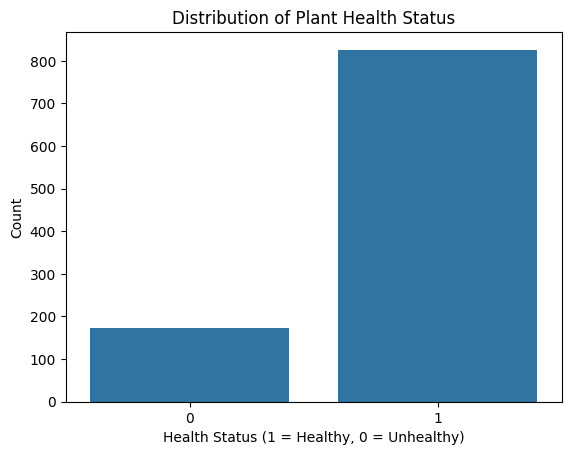

In [ ]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("ziya07/plant-health-monitoring")

print("Path to dataset files:", path)

print("Files in dataset folder:")
print(os.listdir(path))

df = pd.read_csv(os.path.join(path, 'plant_moniter_health_data.csv'))
df.head()

print(df.info())
print(df.describe())
# Check if 'label' column exists before accessing it
if 'label' in df.columns:
    print(df['label'].value_counts())  # if there’s a label column
else:
    print("Column 'label' not found in the DataFrame.")
    # Print available columns for debugging
    print("Available columns:", df.columns)


df.isnull().sum()
df = df.drop_duplicates()


import matplotlib.pyplot as plt
import seaborn as sns

# Example: label distribution
# Replace 'label' with the correct column name if it's different
# Check if 'Plant_Health_Status' column exists before plotting
if 'Plant_Health_Status' in df.columns:
    sns.countplot(x='Plant_Health_Status', data=df)
    plt.show()
else:
    print("Column 'Plant_Health_Status' not found in the DataFrame. Cannot plot.")
    # Print available columns for debugging
    print("Available columns:", df.columns)
print(df.columns)
# Check if 'Plant_Health_Status' column exists before accessing it
if 'Health_Status' in df.columns:
    print(df['Health_Status'].value_counts()) # Use 'Plant_Health_Status' instead of 'label'
else:
    print("Column 'Plant_Health_Status' not found in the DataFrame.")
print(df.columns.tolist())

df['Health_Status'].value_counts()

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Health_Status', data=df)
plt.title("Distribution of Plant Health Status")
plt.xlabel("Health Status (1 = Healthy, 0 = Unhealthy)")
plt.ylabel("Count")
plt.show()

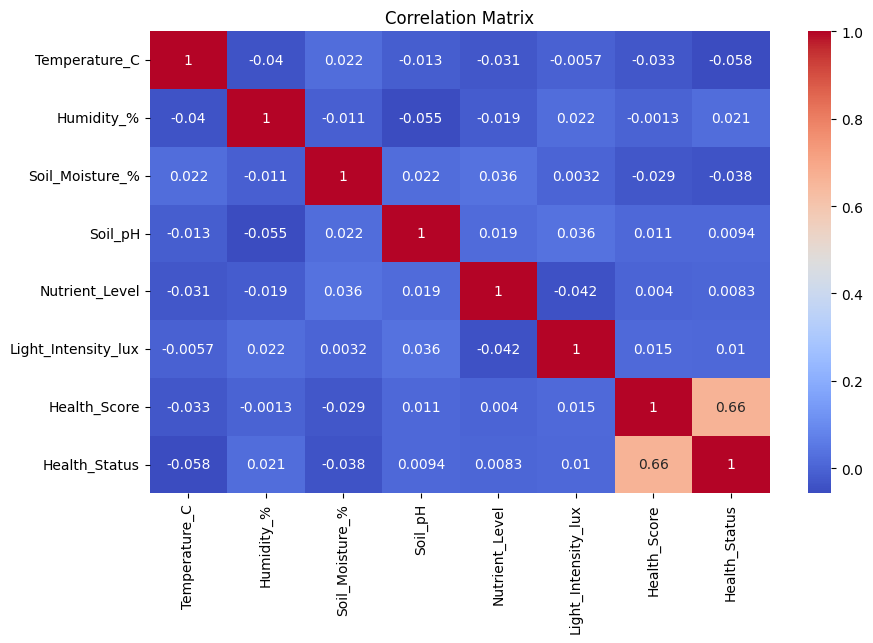

In [ ]:
# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Include Health_Status for correlation
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

X = df.drop(['Plant_ID', 'Health_Status'], axis=1)
y = df['Health_Status']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 29   0]
 [  0 171]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00       171

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



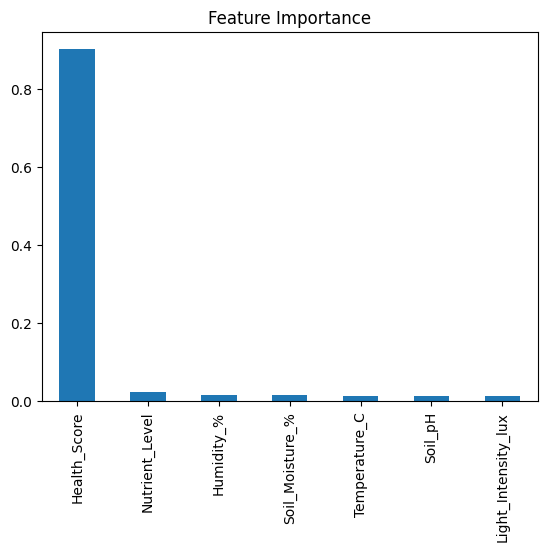

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

# Generate dummy data
np.random.seed(42)
data = {
    'Temperature_C': np.random.uniform(15, 35, 100),
    'Humidity_%': np.random.uniform(30, 90, 100),
    'Soil_Moisture_%': np.random.uniform(10, 60, 100),
    'Soil_pH': np.random.uniform(4.5, 8.5, 100),
    'Nutrient_Level': np.random.randint(0, 3, 100),
    'Light_Intensity_lux': np.random.uniform(2000, 10000, 100),
    'Health_Status': np.random.randint(0, 2, 100)
}

df = pd.DataFrame(data)
X = df.drop('Health_Status', axis=1)
y = df['Health_Status']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
model = RandomForestClassifier()
model.fit(X_scaled, y)

# Save model and scaler
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Dummy model & scaler saved.")

✅ Dummy model & scaler saved.


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pickle

# Load model and scaler
model = pickle.load(open('model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

st.title("🌿 Plant Health Monitoring App")

st.write("Enter plant parameters below to predict if the plant is healthy.")

temperature = st.number_input("🌡️ Temperature (°C)", min_value=0.0, step=0.1)
humidity = st.number_input("💧 Humidity (%)", min_value=0.0, step=0.1)
soil_moisture = st.number_input("🌱 Soil Moisture (%)", min_value=0.0, step=0.1)
soil_ph = st.number_input("🧪 Soil pH", min_value=0.0, step=0.1)
nutrient = st.selectbox("🧬 Nutrient Level", ['Low', 'Medium', 'High'])
light_intensity = st.number_input("🔆 Light Intensity (lux)", min_value=0.0, step=1.0)

# Encode categorical feature
nutrient_map = {'Low': 0, 'Medium': 1, 'High': 2}
nutrient_encoded = nutrient_map[nutrient]

# Make prediction
if st.button("Check Plant Health"):
    features = np.array([[temperature, humidity, soil_moisture, soil_ph, nutrient_encoded, light_intensity]])
    features_scaled = scaler.transform(features)
    prediction = model.predict(features_scaled)
    result = "✅ Healthy" if prediction[0] == 1 else "⚠️ Unhealthy"
    st.success(f"Prediction: {result}")

Overwriting app.py


In [ ]:
!ngrok config add-authtoken 2utRTkat3M4jT2yUaGEQH64464O_7aZKyd7LJi1D2K7zoHv9u

from pyngrok import ngrok

# Start the Streamlit app in the background
!streamlit run app.py &>/content/log.txt &

# Connect to the running Streamlit app with HTTP tunnel
public_url = ngrok.connect(8501, "http")
print("🌐 Streamlit app is live at:", public_url)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
🌐 Streamlit app is live at: NgrokTunnel: "https://1106-35-189-177-25.ngrok-free.app" -> "http://localhost:8501"
